The Cox-Ingersoll-Ross model for interest rates is
$$dr_t=a(b-r_t)dt+\sigma\sqrt{r_t}dW_t,$$
with $a$ a parameter controlling the speed of reversion to the mean $b$. We will approximate our solutions using Euler-Marayama, first substituting the difference terms
$$r_{t+1}-r_t=a(b-r_t)\Delta t + \sigma\sqrt{r_t}(W_{t+1}-W_t).$$
This means our iterative step will be to compute
$$r_{t+1}=r_t+a(b-r_t)\Delta t + \sigma\sqrt{r_t}(W_{t+1}-W_t),$$
where $(W_{t+1}-W_t) \sim N(0, \Delta t)$ as it is a Weiner process.

For more detail on the model: [Cox-Ingersoll-Ross](https://en.wikipedia.org/wiki/Cox–Ingersoll–Ross_model)

For more detail on Euler-Maruyama: [Euler-Maruyama](https://en.wikipedia.org/wiki/Euler–Maruyama_method)

First we setup our functions to generate the weiner process differences, perform a single iteration step and perform the full iteration. For a larger project these could be organised into a class, but for now I have kept them as simple functions.

In [70]:
import numpy as np

def generate_weiner_diffs(n, delta):
    return [np.random.normal(loc=0.0, scale=np.sqrt(delta)) for _ in range(n)]

def single_iter(rt, a, b, delta, sigma, weiner_diff):
    return rt + a*(b-rt)*delta + sigma*np.sqrt(rt)*weiner_diff

def run_sim(n, a, b, r0, sigma, delta):
    output = [ r0 ]
    weiner_diffs = generate_weiner_diffs(n, delta)
    for i in range(n):
        output.append(single_iter(output[i], a, b, delta, sigma, weiner_diffs[i]))
    return output

Next we setup some example parameters and run a few test simulations.

In [83]:
a = 1
b = 1.1
r0 = 0
sigma = 0.09
delta = 0.01
N = 800

test_run_1 = run_sim(N, a, b, r0, sigma, delta)
test_run_2 = run_sim(N, a, b, r0, sigma, delta)

Then using matplotlib we can graph these outputs. You should be able to see that in general the curves tend to the mean of $b=1.1$.

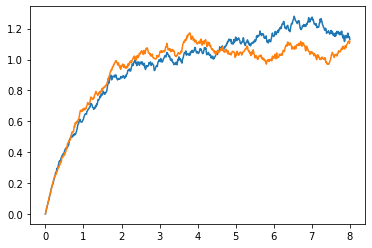

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

total_time = delta*N
time_axis = np.linspace(0, total_time, N+1) # N+1 to account for r0
plt.plot(time_axis.tolist(), test_run_1)
plt.plot(time_axis.tolist(), test_run_2)